In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\pulla\\Downloads\\FuelConsumption.csv")
df.head()

,MODEL_Year,MAKE,MODEL,VEHICLE CLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTION,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,9.8,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,300
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,244


In [4]:
df.describe()

,MODEL_Year,ENGINESIZE,CYLINDERS,FUELCONSUMPTION,CO2EMISSIONS
count,200.0,200.000000,200.000000,200.000000,200.000000
mean,2014.0,3.511500,6.340000,13.780500,269.875000
std,0.0,1.355583,2.026061,3.282337,58.378847
min,2014.0,1.400000,4.000000,7.600000,136.000000
25%,2014.0,2.300000,4.000000,11.475000,227.750000
50%,2014.0,3.000000,6.000000,13.100000,258.000000
75%,2014.0,4.400000,8.000000,15.400000,304.500000
max,2014.0,6.800000,12.000000,25.700000,437.000000


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION,CO2EMISSIONS
0,2.0,4,9.9,196
1,2.4,4,11.2,221
2,1.5,4,9.8,136
3,3.5,6,12.7,300
4,3.5,6,12.1,244
5,3.5,6,11.9,230
6,3.5,6,12.0,232
7,3.7,6,12.8,255
8,3.7,6,13.4,380


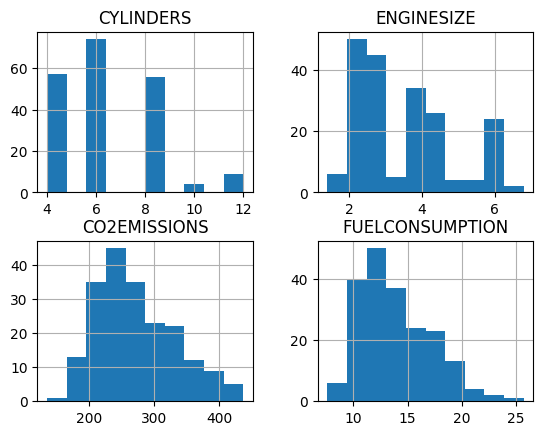

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION']]
viz.hist()
plt.show()

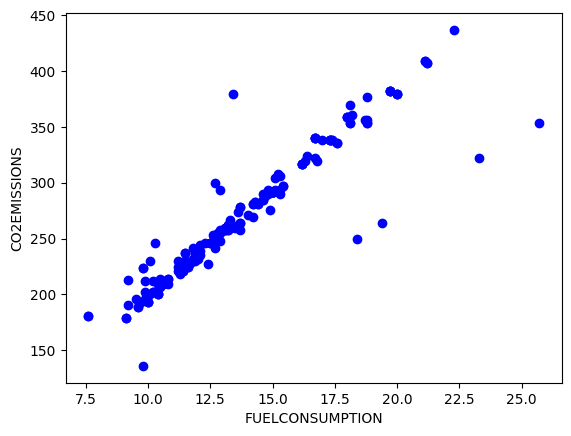

In [8]:
plt.scatter(cdf.FUELCONSUMPTION, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("CO2EMISSIONS")
plt.show()

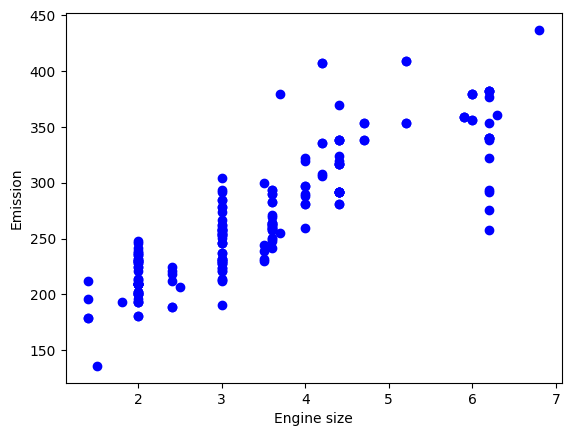

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [10]:
print(len(df))
msk = np.random.rand(len(df)) < 0.8
print(msk)
train = cdf[msk]
print(train)
test = cdf[~msk]
print(test)
index = test.index
print(len(index))

200
[False  True  True  True  True  True  True  True  True False  True  True
  True False  True  True  True False False  True  True False  True  True
 False  True  True  True  True  True  True  True  True False  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True False  True
 False False  True  True  True False  True  True  True  True False False
 False  True  True  True  True  True  True  True False  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True False  True  True  True  True  True False
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True False  True False  True  True  True  True
  True False  True  True  True False  True  Tru

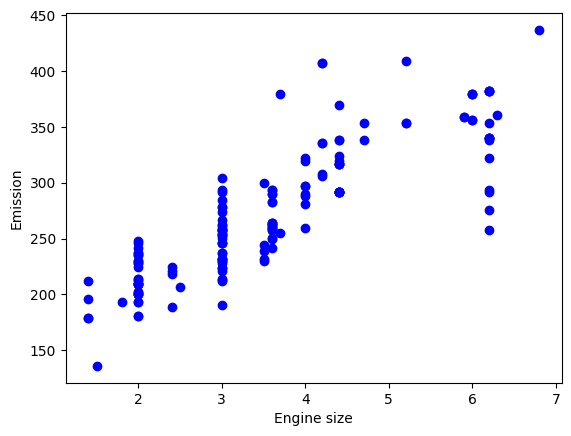

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [14]:
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

LinearRegression()

In [15]:
print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[36.1451314]]
Intercept:  [142.6401464]


Text(0, 0.5, 'Emission')

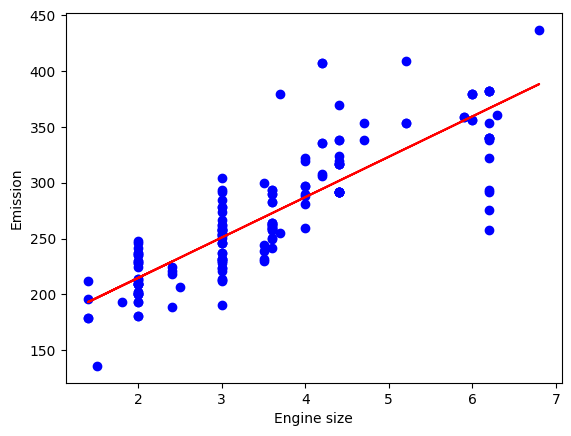

In [16]:
y_pred = regr.predict(test_x)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
y_pred = regr.predict(test_x)

In [18]:
df = pd.DataFrame({'Actual': test_y.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,196,214.930409
1,212,229.388462
2,359,355.896422
3,338,312.522264
4,354,312.522264
5,230,214.930409
6,230,214.930409
7,227,251.075541
8,239,214.930409
9,409,330.594830


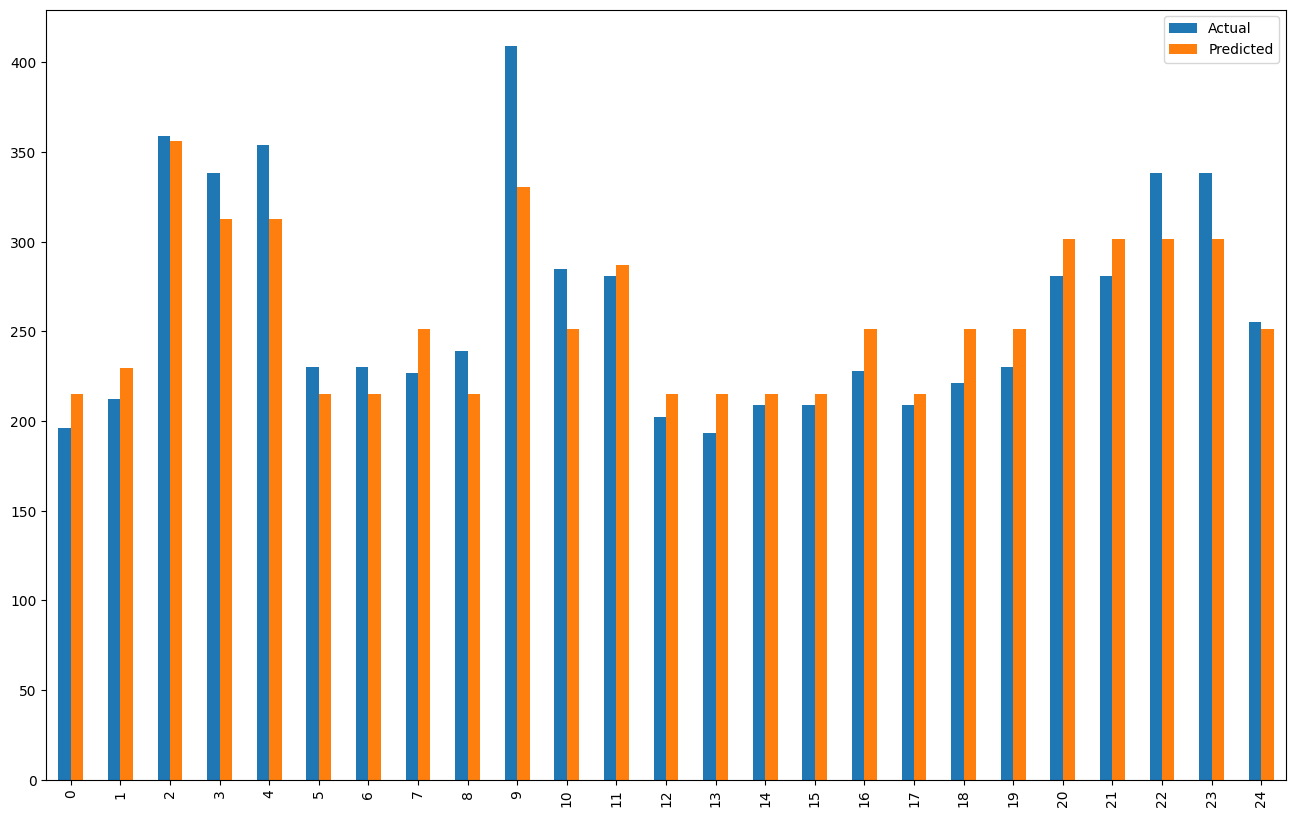

In [19]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

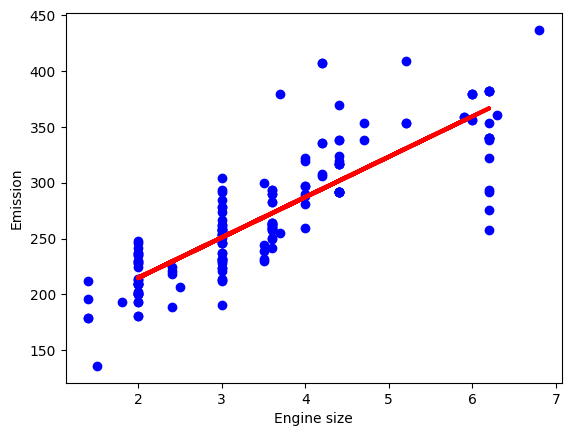

In [20]:
plt.scatter(train_x, train_y, color='blue')
plt.plot(test_x, y_pred, color='red', linewidth=3)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [22]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - test_y) ** 2))


Mean absolute error: 19.58
Residual sum of squares (MSE): 607.34
